# Q2

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("Q2.csv")
df

,score 1,score 2,pass/fail
0,-0.092742,0.684940,1
1,-0.213710,0.692250,1
2,-0.375000,0.502190,1
3,-0.513250,0.465640,1
4,-0.524770,0.209800,1
...,...,...,...
113,-0.593890,0.494880,0
114,-0.484450,0.999270,0
115,-0.006336,0.999270,0
116,0.632650,-0.030612,0


In [3]:
class Model:
    def __init__(self, df, test_size):
        self.df = df
        self.test_size = test_size
        self.features = self.df.drop("pass/fail", axis='columns')
        self.labels = self.df['pass/fail']
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(self.features, self.labels, test_size=test_size)
        
    def plot_train(self):
        plt.scatter(self.x_train['score 1'], self.x_train['score 2'], c=self.y_train)
        plt.xlabel("Score 1")
        plt.ylabel("Score 2")
        plt.show()
        
    def feature_eng(self):
        for i in range(1,5):
            for j in range(1,i):
                new_feature = self.features['score 1'].values ** i + self.features['score 2'].values ** j
                self.features[f'score{i}{j}'] = new_feature.T
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(self.features, self.labels, test_size=self.test_size)
        return self.features
    
    def logistic_reg(self):
        log_reg_reg = LogisticRegression(C=0.5)
        log_reg_reg.fit(self.x_train, self.y_train)
        train_acc_reg, test_acc_reg = log_reg_reg.score(self.x_train, self.y_train), log_reg_reg.score(self.x_test, self.y_test)
        log_reg = LogisticRegression(penalty='none')
        log_reg.fit(self.x_train, self.y_train)
        train_acc, test_acc = log_reg.score(self.x_train, self.y_train), log_reg.score(self.x_test, self.y_test)
        
        print("Without Regularization:")
        print("Train Accuracy: ", train_acc)
        print("Test Accuracy: ", test_acc)
        print("With Regularization:")
        print("Train Accuracy: ", train_acc_reg)
        print("Test Accuracy: ", test_acc_reg)

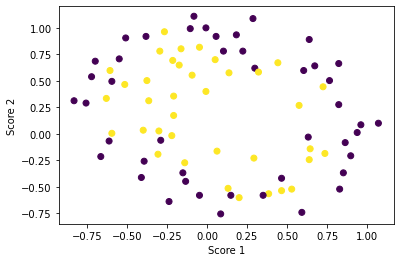

In [4]:
model = Model(df, 0.3)
model.plot_train()

In [5]:
model.feature_eng()

,score 1,score 2,score21,score31,score32,score41,score42,score43
0,-0.092742,0.684940,0.693541,0.684142,0.468345,0.685014,0.469217,0.321409
1,-0.213710,0.692250,0.737922,0.682489,0.469450,0.694336,0.481296,0.333819
2,-0.375000,0.502190,0.642815,0.449456,0.199460,0.521965,0.271970,0.146425
3,-0.513250,0.465640,0.729066,0.330437,0.081617,0.535033,0.286214,0.170353
4,-0.524770,0.209800,0.485184,0.065287,-0.100497,0.285636,0.119852,0.085071
...,...,...,...,...,...,...,...,...
113,-0.593890,0.494880,0.847585,0.285412,0.035438,0.619281,0.369307,0.245600
114,-0.484450,0.999270,1.233962,0.885574,0.884844,1.054350,1.053621,1.052892
115,-0.006336,0.999270,0.999310,0.999270,0.998540,0.999270,0.998541,0.997812
116,0.632650,-0.030612,0.369634,0.222604,0.254153,0.129585,0.161134,0.160168


In [6]:
model.logistic_reg()

Without Regularization:
Train Accuracy:  0.7560975609756098
Test Accuracy:  0.8333333333333334
With Regularization:
Train Accuracy:  0.7439024390243902
Test Accuracy:  0.8333333333333334
